In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn")
import prince

## Data

In [2]:
ind= pd.read_csv("../Datasets/India_2021_desc.csv")
ind_a= pd.read_csv("../Datasets/India_2021_access.csv")
ind_u= pd.read_csv("../Datasets/India_2021_usage.csv")

alg= pd.read_csv('../Datasets/Algeria_2021_desc.csv')
alg_a= pd.read_csv('../Datasets/Algeria_2021_access.csv')
alg_u= pd.read_csv('../Datasets/Algeria_2021_usage.csv')

nor= pd.read_csv("../Datasets/Norway_2021_desc.csv")
nor_a= pd.read_csv("../Datasets/Norway_2021_access.csv")
nor_u= pd.read_csv("../Datasets/Norway_2021_usage.csv")

sa= pd.read_csv('../Datasets/South Africa_2021_desc.csv')
sa_a= pd.read_csv('../Datasets/South Africa_2021_access.csv')
sa_u= pd.read_csv('../Datasets/South Africa_2021_usage.csv')

cam= pd.read_csv("../Datasets/Cameroon_2021_desc.csv")
cam_a= pd.read_csv("../Datasets/Cameroon_2021_access.csv")
cam_u= pd.read_csv("../Datasets/Cameroon_2021_usage.csv")

ken= pd.read_csv('../Datasets/Kenya_2021_desc.csv')
ken_a= pd.read_csv('../Datasets/Kenya_2021_access.csv')
ken_u= pd.read_csv('../Datasets/Kenya_2021_usage.csv')

jap= pd.read_csv("../Datasets/Japan_2021_desc.csv")
jap_a= pd.read_csv("../Datasets/Japan_2021_access.csv")
jap_u= pd.read_csv("../Datasets/Japan_2021_usage.csv")

bra= pd.read_csv('../Datasets/Brazil_2021_desc.csv')
bra_a= pd.read_csv('../Datasets/Brazil_2021_access.csv')
bra_u= pd.read_csv('../Datasets/Brazil_2021_usage.csv')

In [3]:
ctry= [alg, bra, cam, ind, jap, ken, nor, sa]
ctry_a= [alg_a, bra_a, cam_a, ind_a, jap_a, ken_a, nor_a, sa_a]
ctry_u= [alg_u, bra_u, cam_u, ind_u, jap_u, ken_u, nor_u, sa_u]
ctry_name= ['Algeria', 'Brazil', 'Cameroon', 'India', 'Japan', 'Kenya', 'Norway', 
            'South Africa']
df= pd.concat(ctry, axis=0)
df_a= pd.concat(ctry_a, axis=0)
df_u= pd.concat(ctry_u, axis=0)

In [4]:
df_u= pd.concat([df_u, df["economy"]], axis=1)
df_u

,wgt,female,age,educ,inc_q,fin4,fin5,fin8,fin9,fin10,...,fin31b,fin32,fin37,fin38,saved,borrowed,anydigpayment,merchantpay_dig,fin34a,economy
0,1.120227,1,1.0,2,5,No,No,NaN,Yes,Yes,...,NaN,No,2,No,1,2,2,2.0,0,Algeria
1,2.020042,2,5.0,1,1,NaN,No,NaN,Yes,Yes,...,No,Yes,1,No,2,1,1,2.0,1,Algeria
2,0.315414,2,2.0,3,5,Yes,Yes,NaN,Yes,Yes,...,No,Yes,2,No,1,1,1,1.0,1,Algeria
3,0.366572,2,1.0,2,1,NaN,NaN,NaN,NaN,NaN,...,No,Yes,1,No,1,1,2,2.0,0,Algeria
4,0.229559,2,5.0,2,4,No,Yes,NaN,Yes,Yes,...,No,No,2,No,1,2,1,1.0,0,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1.115406,2,2.0,2,4,NaN,NaN,NaN,NaN,NaN,...,NaN,No,2,No,2,2,2,2.0,0,South Africa
1010,0.523865,1,2.0,2,4,Yes,Yes,NaN,Yes,Yes,...,Yes,Yes,2,No,1,1,1,1.0,1,South Africa
1011,3.632846,2,1.0,2,2,NaN,Yes,NaN,Yes,No,...,NaN,No,2,No,1,1,1,2.0,0,South Africa
1012,1.511462,1,1.0,2,5,Yes,Yes,NaN,Yes,Yes,...,NaN,No,2,No,2,1,1,1.0,0,South Africa


## Gender

In [5]:
counts = df.groupby(['economy', 'fin34a', 'female']).size().reset_index(name='count')
total_counts = counts.groupby(['economy', 'fin34a'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
counts= counts[counts["fin34a"]== 1]
pivot_table = counts.pivot(index=['economy'], columns='female', 
                           values='percentage')

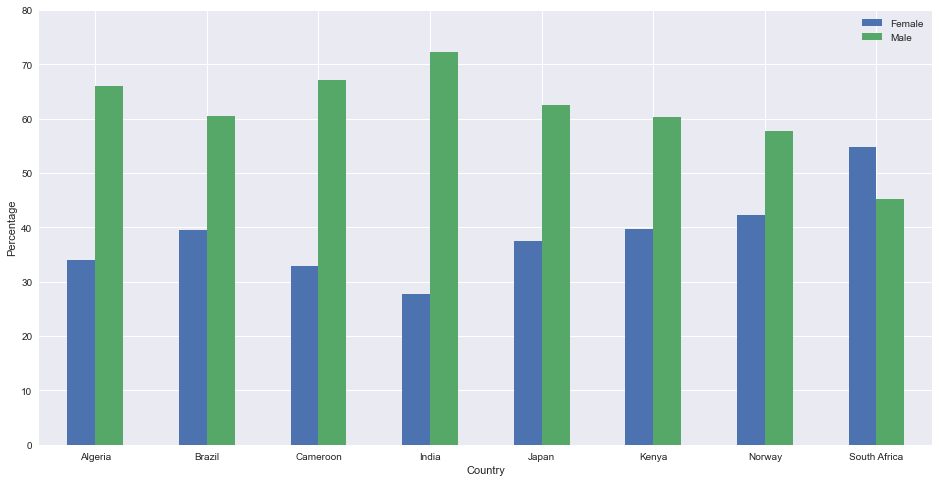

In [6]:
#colors = ['#800000', '#008000']
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Country')
plt.ylabel('Percentage')
legend_labels = ['Female', 'Male']
ax.legend(legend_labels)
plt.ylim([0, 80])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/desc_gender.png', bbox_inches='tight')
# Display the plot
plt.show()

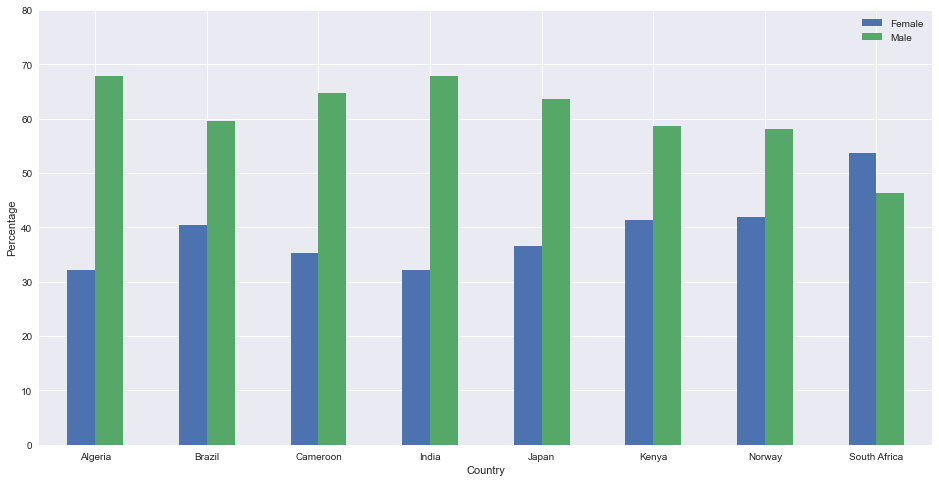

In [7]:
df_u= df_u[df_u["fin32"]=="Yes"]
counts = df_u.groupby(['economy', 'female']).size().reset_index(name='count')
total_counts = counts.groupby(['economy'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
pivot_table = counts.pivot(index=['economy'], columns='female', 
                           values='percentage')
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Country')
plt.ylabel('Percentage')
legend_labels = ['Female', 'Male']
ax.legend(legend_labels)
plt.ylim([0, 80])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/des_gender.png', bbox_inches='tight')
# Display the plot
plt.show()

## Age

In [8]:
counts = df.groupby(['economy', 'fin34a', 'age']).size().reset_index(name='count')
total_counts = counts.groupby(['economy', 'fin34a'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
counts= counts[counts["fin34a"]== 1]
pivot_table = counts.pivot(index=['economy'], columns='age', 
                           values='percentage')

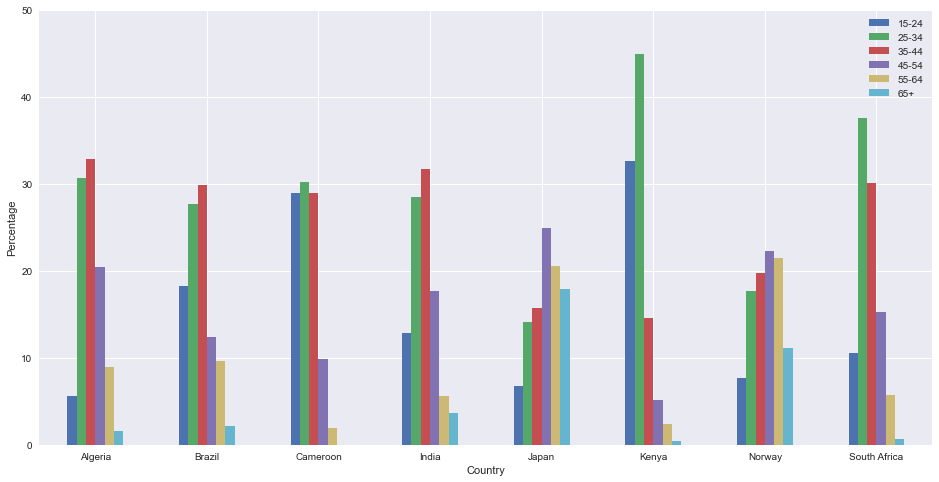

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Country')
plt.ylabel('Percentage')
legend_labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+']
ax.legend(legend_labels)
plt.ylim([0, 50])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/desc_age.png', bbox_inches='tight')
# Display the plot
plt.show()

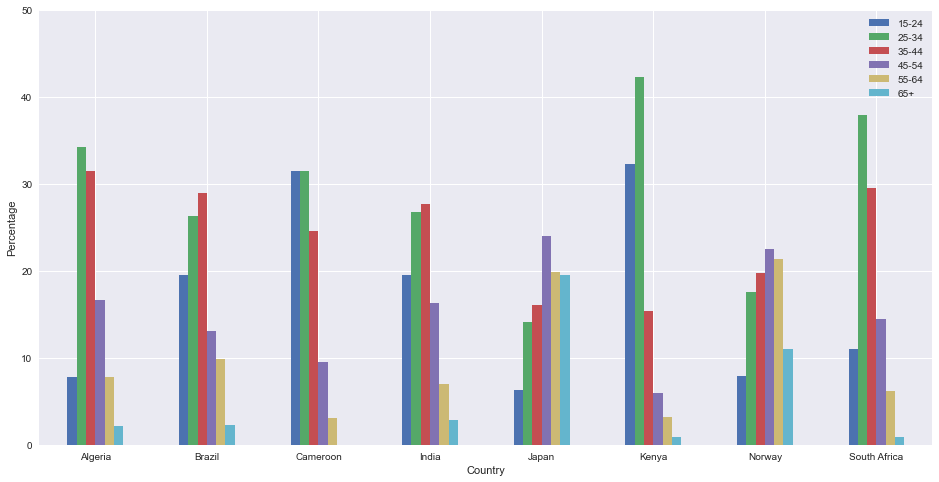

In [10]:
counts = df_u.groupby(['economy', 'age']).size().reset_index(name='count')
total_counts = counts.groupby(['economy'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
pivot_table = counts.pivot(index=['economy'], columns='age', 
                           values='percentage')
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Country')
plt.ylabel('Percentage')
legend_labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+']
ax.legend(legend_labels)
plt.ylim([0, 50])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/des_age.png', bbox_inches='tight')
# Display the plot
plt.show()

## Education Level

In [11]:
counts = df.groupby(['economy', 'fin34a', 'educ']).size().reset_index(name='count')
total_counts = counts.groupby(['economy', 'fin34a'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
counts= counts[counts["fin34a"]== 1]
pivot_table = counts.pivot(index=['economy'], columns='educ', 
                           values='percentage')

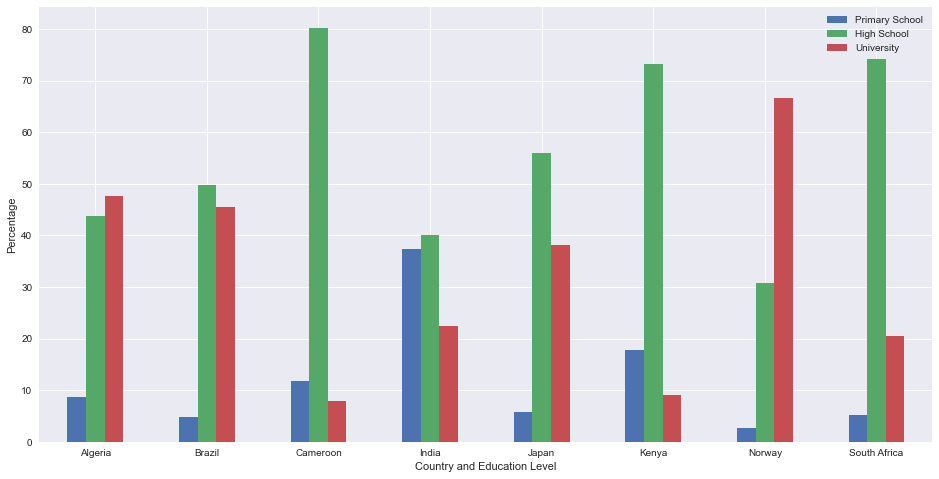

In [12]:
#colors = ['#800000', '#000080']
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Country and Education Level')
plt.ylabel('Percentage')
legend_labels = ['Primary School', 'High School', 'University']
ax.legend(legend_labels)


# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/desc_educ.png', bbox_inches='tight')
# Display the plot
plt.show()

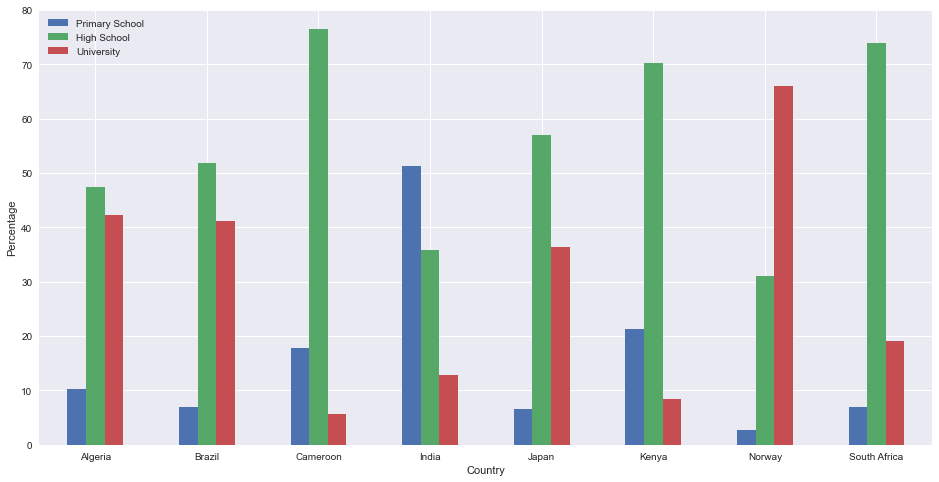

In [13]:
counts = df_u.groupby(['economy', 'educ']).size().reset_index(name='count')
total_counts = counts.groupby(['economy'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
pivot_table = counts.pivot(index=['economy'], columns='educ', 
                           values='percentage')
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Country')
plt.ylabel('Percentage')
legend_labels = ['Primary School', 'High School', 'University']
ax.legend(legend_labels)
plt.ylim([0, 80])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/des_educ.png', bbox_inches='tight')
# Display the plot
plt.show()

# Income Level

In [14]:
counts = df.groupby(['economy', 'fin34a', 'inc_q']).size().reset_index(name='count')
total_counts = counts.groupby(['economy', 'fin34a'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
counts= counts[counts["fin34a"]== 1]
pivot_table = counts.pivot(index=['economy'], columns='inc_q', 
                           values='percentage')

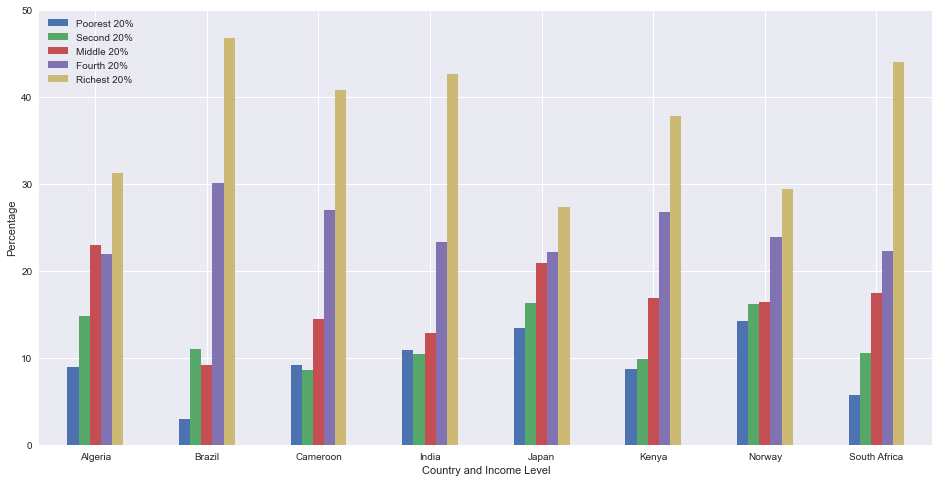

In [15]:
#colors = ['#800000', '#000080']
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Country and Income Level')
plt.ylabel('Percentage')
legend_labels = ['Poorest 20%', 'Second 20%', 'Middle 20%', 'Fourth 20%', 'Richest 20%']
ax.legend(legend_labels)
plt.ylim([0, 50])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/desc_inc.png', bbox_inches='tight')
# Display the plot
plt.show()

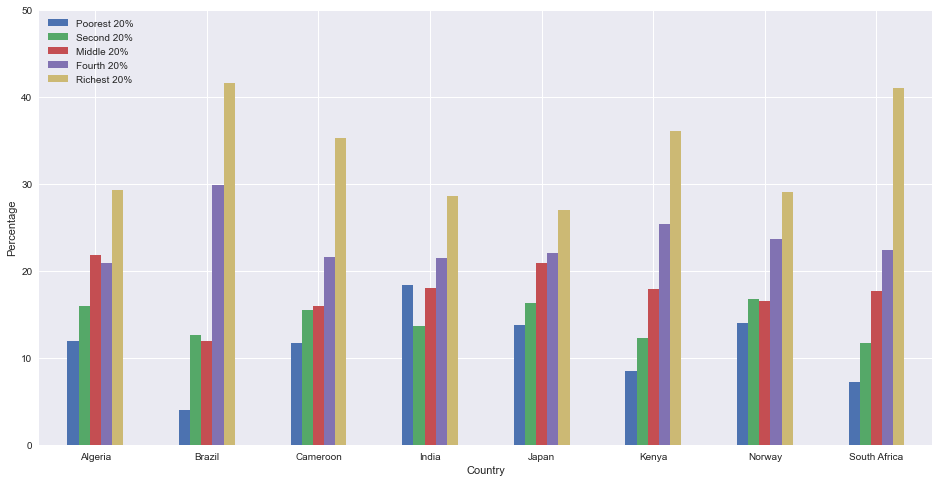

In [16]:
counts = df_u.groupby(['economy', 'inc_q']).size().reset_index(name='count')
total_counts = counts.groupby(['economy'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
pivot_table = counts.pivot(index=['economy'], columns='inc_q', 
                           values='percentage')
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Country')
plt.ylabel('Percentage')
legend_labels = ['Poorest 20%', 'Second 20%', 'Middle 20%', 'Fourth 20%', 'Richest 20%']
ax.legend(legend_labels)
plt.ylim([0, 50])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/des_inc.png', bbox_inches='tight')
# Display the plot
plt.show()

## MCA

In [17]:
import pandas as pd

data = {
    "countries": ["Algeria", "Brazil", "Cameroon", "India", "Japan", "Kenya", "Norway", "South Africa"],
    "accuracy": [93.53, 94.03, 91., 97.33, 92.08, 95., 97.01, 96.55]
}

df = pd.DataFrame(data)

print(df)


      countries  accuracy
0       Algeria     93.53
1        Brazil     94.03
2      Cameroon     91.00
3         India     97.33
4         Japan     92.08
5         Kenya     95.00
6        Norway     97.01
7  South Africa     96.55


In [23]:
list(df["countries"])

['Algeria',
 'Brazil',
 'Cameroon',
 'India',
 'Japan',
 'Kenya',
 'Norway',
 'South Africa']

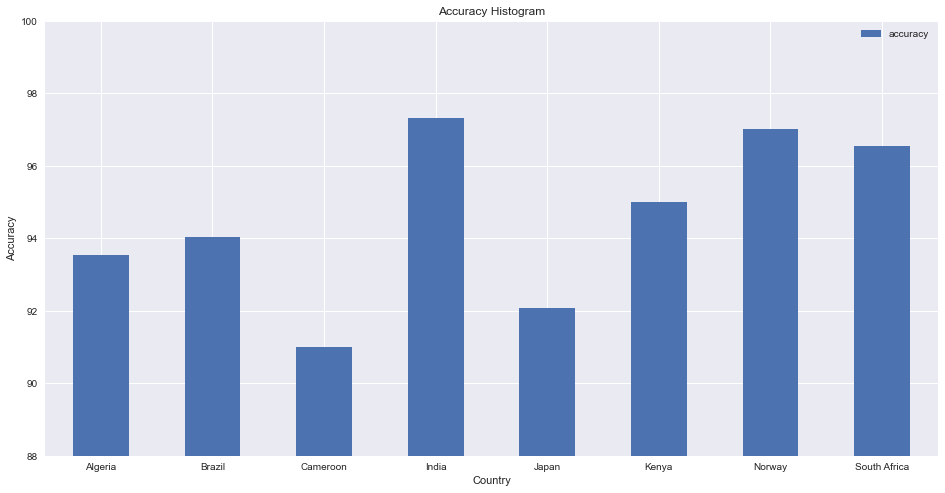

In [28]:
fig, ax = plt.subplots(figsize=(16, 8))
df.plot(kind='bar', stacked=False, ax=ax)
plt.xlabel("Country")
plt.ylabel("Accuracy")
plt.title("Prediction Accuracy")
plt.xticks(list(range(8)), list(df["countries"]), rotation=0)
plt.ylim([88, 100])
# Show the plot
plt.show()